<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Trian your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for _at least_ two of the four "configurations":

1. Using a `tensorflow` network (we did _not_ cover this in class!)
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
X = df.drop(columns = 'label')
y =df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=5)

In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [10]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [11]:
cnn = Sequential()

In [12]:
cnn.add(Conv2D(filters = 6,
              kernel_size = (3,3),
              activation = 'relu',
              input_shape = (28, 28, 1)))


In [13]:
cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
cnn.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu'))

In [15]:
cnn.add(MaxPooling2D(pool_size = (2, 2)))

In [16]:
cnn.add(Flatten())

In [17]:
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dense(10, activation = 'softmax'))

In [18]:
cnn.compile(loss = 'categorical_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [19]:
history = cnn.fit(X_train, y_train,
                 validation_data = (X_test, y_test),
                 batch_size = 256,
                 epochs= 10)

Epoch 1/10
124/124 [==============================] - 9s 66ms/step - loss: 0.8083 - accuracy: 0.7556 - val_loss: 0.2491 - val_accuracy: 0.9294
Epoch 2/10
124/124 [==============================] - 9s 70ms/step - loss: 0.1897 - accuracy: 0.9444 - val_loss: 0.1730 - val_accuracy: 0.9505
Epoch 3/10
124/124 [==============================] - 7s 60ms/step - loss: 0.1292 - accuracy: 0.9612 - val_loss: 0.1230 - val_accuracy: 0.9614
Epoch 4/10
124/124 [==============================] - 7s 56ms/step - loss: 0.0994 - accuracy: 0.9699 - val_loss: 0.1052 - val_accuracy: 0.9686
Epoch 5/10
124/124 [==============================] - 7s 53ms/step - loss: 0.0851 - accuracy: 0.9745 - val_loss: 0.0851 - val_accuracy: 0.9741
Epoch 6/10
124/124 [==============================] - 7s 53ms/step - loss: 0.0719 - accuracy: 0.9784 - val_loss: 0.0801 - val_accuracy: 0.9750
Epoch 7/10
124/124 [==============================] - 7s 53ms/step - loss: 0.0645 - accuracy: 0.9799 - val_loss: 0.0702 - val_accuracy: 0.9793

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

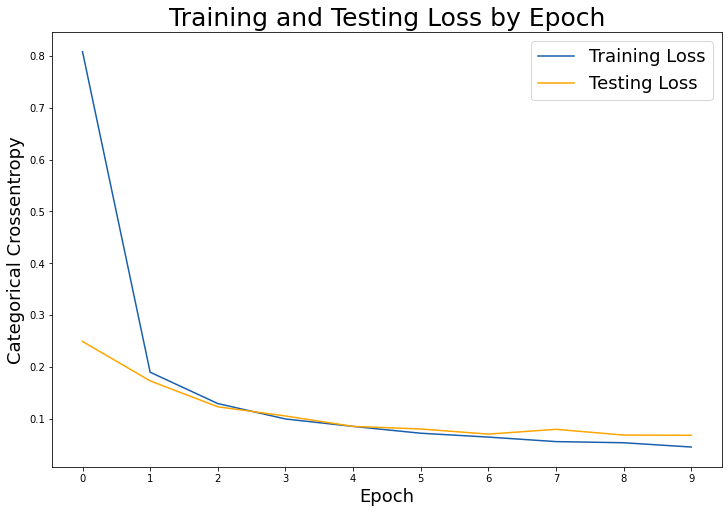

In [21]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

In [22]:
cnn_score = cnn.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn.metrics_names

329/329 [==============================] - 2s 5ms/step - loss: 0.0680 - accuracy: 0.9790


In [23]:
X_train =X_train.reshape(-1, 784) 
X_test = X_test.reshape(-1, 784)

In [24]:
X_train.shape

(31500, 784)

In [25]:
y_train.shape

(31500, 10)

In [32]:
model = Sequential()
model.add(Dense(70, input_shape = (784,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [33]:
model.compile(loss = 'categorical_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [34]:
history = model.fit(X_train, y_train,
                 validation_data = (X_test, y_test),
                 batch_size = 256,
                 epochs= 10)

Epoch 1/10
124/124 [==============================] - 1s 4ms/step - loss: 0.8122 - accuracy: 0.7693 - val_loss: 0.3513 - val_accuracy: 0.9017
Epoch 2/10
124/124 [==============================] - 1s 4ms/step - loss: 0.2861 - accuracy: 0.9196 - val_loss: 0.2659 - val_accuracy: 0.9260
Epoch 3/10
124/124 [==============================] - 1s 5ms/step - loss: 0.2294 - accuracy: 0.9332 - val_loss: 0.2346 - val_accuracy: 0.9340
Epoch 4/10
124/124 [==============================] - 1s 5ms/step - loss: 0.1894 - accuracy: 0.9458 - val_loss: 0.2045 - val_accuracy: 0.9426
Epoch 5/10
124/124 [==============================] - 1s 5ms/step - loss: 0.1621 - accuracy: 0.9538 - val_loss: 0.1857 - val_accuracy: 0.9468
Epoch 6/10
124/124 [==============================] - 1s 5ms/step - loss: 0.1420 - accuracy: 0.9601 - val_loss: 0.1731 - val_accuracy: 0.9493
Epoch 7/10
124/124 [==============================] - 1s 5ms/step - loss: 0.1262 - accuracy: 0.9642 - val_loss: 0.1636 - val_accuracy: 0.9517
Epoch 

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 70)                54950     
                                                                 
 dense_7 (Dense)             (None, 20)                1420      
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
Total params: 56,580
Trainable params: 56,580
Non-trainable params: 0
_________________________________________________________________


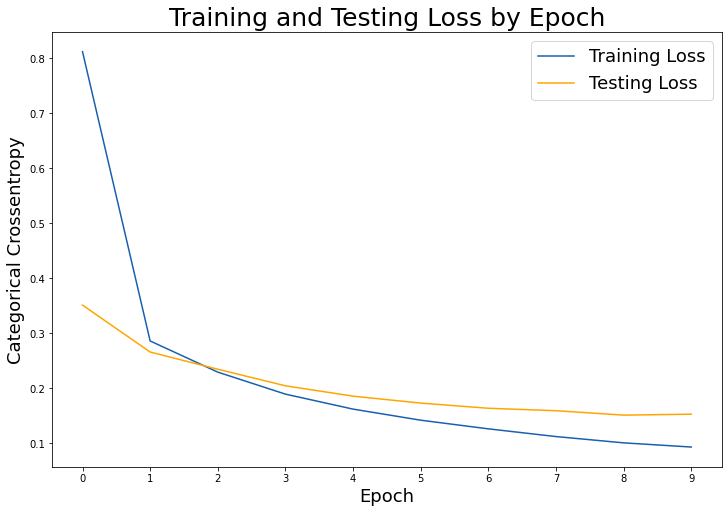

In [36]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);